<a href="https://colab.research.google.com/github/GeniusJr001/deeplearning/blob/main/Plant%20Classification%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yudhaislamisulistya/plants-type-datasets")

print("Path to dataset files:", path)

100%|██████████| 937M/937M [00:07<00:00, 130MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/yudhaislamisulistya/plants-type-datasets/versions/16


In [ ]:
import os

# The path variable holds the path to the downloaded dataset
print(os.listdir(path))

['split_ttv_dataset_type_of_plants']


In [ ]:
PATH = os.path.join(path, 'split_ttv_dataset_type_of_plants')

train_dir = os.path.join(PATH, 'Train_Set_Folder')
validation_dir = os.path.join(PATH, 'Validation_Set_Folder')
test_dir = os.path.join(PATH, 'Test_Set_Folder')

In [ ]:
# Get number of files in each directory. The train, test and validation directories
# each have the subdirecories plant names and images.


total_train = 0
for root, dirs, files in os.walk(train_dir):
    total_train += len(files)

total_val = 0
for root, dirs, files in os.walk(validation_dir):
    total_val += len(files)

total_test = 0
for root, dirs, files in os.walk(test_dir):
    total_test += len(files)

print(f"Total train files: {total_train}")
print(f"Total validation files: {total_val}")
print(f"Total test files: {total_test}")

Total train files: 23972
Total validation files: 3030
Total test files: 2998


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# PREPROCESSING

## RESCALING

## Augmenting the images

In [ ]:
train_image_generator = ImageDataGenerator(
    rescale=1 / 255.0,
    rotation_range=20,
    zoom_range=0.05,
    width_shift_range=0.05,
    height_shift_range=0.05,
    shear_range=0.05,
    horizontal_flip=True,
    fill_mode="nearest",
    validation_split=(0.20)
)


## Task


In [ ]:
import os

# Define the mapping of species to families. This is a placeholder and should be replaced
# with the actual mapping based on the dataset.
plant_data = {
    'aloevera': {'group': 'Angiosperm', 'family': 'Asphodelaceae', 'species': 'Aloe vera'},
    'Banana': {'group': 'Angiosperm', 'family': 'Musaceae', 'species': 'Musa acuminata'},
    'Bilimbi': {'group': 'Angiosperm', 'family': 'Oxalidaceae', 'species': 'Averrhoa bilimbi'},
    'Cantaloupe': {'group': 'Angiosperm', 'family': 'Cucurbitaceae', 'species': 'Cucumis melo cantalupensis'},
    'Cassava': {'group': 'Angiosperm', 'family': 'Euphorbiaceae', 'species': 'Manihot esculenta'},
    'Corn': {'group': 'Angiosperm', 'family': 'Poaceae', 'species': 'Zea mays'},
    'Coconut': {'group': 'Angiosperm', 'family': 'Arecaceae', 'species': 'Cocos nucifera'},
    'Cucumber': {'group': 'Angiosperm', 'family': 'Cucurbitaceae', 'species': 'Cucumis sativus'},
    'Curcuma': {'group': 'Angiosperm', 'family': 'Zingiberaceae', 'species': 'Curcuma longa'},
    'Eggplant': {'group': 'Angiosperm', 'family': 'Solanaceae', 'species': 'Solanum melongena'},
    'Galangal': {'group': 'Angiosperm', 'family': 'Zingiberaceae', 'species': 'Alpinia galanga'},
    'Ginger': {'group': 'Angiosperm', 'family': 'Zingiberaceae', 'species': 'Zingiber officinale'},
    'Guava': {'group': 'Angiosperm', 'family': 'Myrtaceae', 'species': 'Psidium guajava'},
    'Kale': {'group': 'Angiosperm', 'family': 'Brassicaceae', 'species': 'Brassica oleracea var. sabellica'},
    'Longbeans': {'group': 'Angiosperm', 'family': 'Fabaceae', 'species': 'Vigna unguiculata subsp. sesquipedalis'},
    'Mango': {'group': 'Angiosperm', 'family': 'Anacardiaceae', 'species': 'Mangifera indica'},
    'Melon': {'group': 'Angiosperm', 'family': 'Cucurbitaceae', 'species': 'Cucumis melo'},
    'Orange': {'group': 'Angiosperm', 'family': 'Rutaceae', 'species': 'Citrus sinensis'},
    'Paddy': {'group': 'Angiosperm', 'family': 'Poaceae', 'species': 'Oryza sativa'},
    'Papaya': {'group': 'Angiosperm', 'family': 'Caricaceae', 'species': 'Carica papaya'},
    'Peper chili': {'group': 'Angiosperm', 'family': 'Solanaceae', 'species': 'Capsicum annuum'},
    'Pineapple': {'group': 'Angiosperm', 'family': 'Bromeliaceae', 'species': 'Ananas comosus'},
    'Pomelo': {'group': 'Angiosperm', 'family': 'Rutaceae', 'species': 'Citrus maxima'},
    'Shallot': {'group': 'Angiosperm', 'family': 'Amaryllidaceae', 'species': 'Allium cepa var. aggregatum'},
    'Soybeans': {'group': 'Angiosperm', 'family': 'Fabaceae', 'species': 'Glycine max'},
    'Spinach': {'group': 'Angiosperm', 'family': 'Amaranthaceae', 'species': 'Spinacia oleracea'},
    'Sweet potatoes': {'group': 'Angiosperm', 'family': 'Convolvulaceae', 'species': 'Ipomoea batatas'},
    'Tobacco': {'group': 'Angiosperm', 'family': 'Solanaceae', 'species': 'Nicotiana tabacum'},
    'Waterapple': {'group': 'Angiosperm', 'family': 'Myrtaceae', 'species': 'Syzygium samarangense'},
    'Watermelon': {'group': 'Angiosperm', 'family': 'Cucurbitaceae', 'species': 'Citrullus lanatus'}
}

In [ ]:
import os

# Create a list of unique groups, families, and species for directory creation
unique_groups = list(set([data['group'] for data in plant_data.values()]))

# Define the new base directory for the reorganized dataset
new_base_dir = '/tmp/reorganized_plants_dataset_hierarchical'

import shutil

# Remove the old reorganized dataset directory if it exists
if os.path.exists(new_base_dir):
    shutil.rmtree(new_base_dir)

# Then recreate the base directory
os.makedirs(new_base_dir)

# Now rerun the corrected directory creation code:
for common_name, data in plant_data.items():
    group = data['group']
    family = data['family']
    species = data['species']

    # Directory format: Group/Family/Common Name (Species)
    species_dir = os.path.join(new_base_dir, group, family, f"{common_name} ({species})")
    os.makedirs(species_dir, exist_ok=True)

In [ ]:
from collections import defaultdict

# Build a dict of families and their species
family_species = defaultdict(list)
for data in plant_data.values():
    family_species[data['family']].append(data['species'])

# Print species under each family
for family, species_list in family_species.items():
    print(f"{family}: {species_list}")

Asphodelaceae: ['Aloe vera']
Musaceae: ['Musa acuminata']
Oxalidaceae: ['Averrhoa bilimbi']
Cucurbitaceae: ['Cucumis melo cantalupensis', 'Cucumis sativus', 'Cucumis melo', 'Citrullus lanatus']
Euphorbiaceae: ['Manihot esculenta']
Poaceae: ['Zea mays', 'Oryza sativa']
Arecaceae: ['Cocos nucifera']
Zingiberaceae: ['Curcuma longa', 'Alpinia galanga', 'Zingiber officinale']
Solanaceae: ['Solanum melongena', 'Capsicum annuum', 'Nicotiana tabacum']
Myrtaceae: ['Psidium guajava', 'Syzygium samarangense']
Brassicaceae: ['Brassica oleracea var. sabellica']
Fabaceae: ['Vigna unguiculata subsp. sesquipedalis', 'Glycine max']
Anacardiaceae: ['Mangifera indica']
Rutaceae: ['Citrus sinensis', 'Citrus maxima']
Caricaceae: ['Carica papaya']
Bromeliaceae: ['Ananas comosus']
Amaryllidaceae: ['Allium cepa var. aggregatum']
Amaranthaceae: ['Spinacia oleracea']
Convolvulaceae: ['Ipomoea batatas']


In [ ]:
family_species = defaultdict(list)
for common_name, data in plant_data.items():
    family_species[data['family']].append(f"{common_name} ({data['species']})")

In [ ]:
def display_directory_tree(base_dir):
    for root, dirs, files in os.walk(base_dir):
        # Calculate indentation based on folder depth
        level = root.replace(base_dir, '').count(os.sep)
        indent = ' ' * 4 * level
        print(f'{indent}{os.path.basename(root)}/')
        # display files inside each directory
        # for f in files:
        #     print(f'{indent}    {f}')

# Run the directory structure tester
print("Directory structure under", new_base_dir)
display_directory_tree(new_base_dir)

# Create new train, validation, and test directories from the reorganized dataset
new_train_dir = os.path.join(new_base_dir, 'Train')
new_val_dir = os.path.join(new_base_dir, 'Validation')
new_test_dir = os.path.join(new_base_dir, 'Test')

# Create these directories
os.makedirs(new_train_dir, exist_ok=True)
os.makedirs(new_val_dir, exist_ok=True)
os.makedirs(new_test_dir, exist_ok=True)

Directory structure under /tmp/reorganized_plants_dataset_hierarchical
reorganized_plants_dataset_hierarchical/
    Angiosperm/
        Caricaceae/
            Papaya (Carica papaya)/
        Euphorbiaceae/
            Cassava (Manihot esculenta)/
        Amaranthaceae/
            Spinach (Spinacia oleracea)/
        Amaryllidaceae/
            Shallot (Allium cepa var. aggregatum)/
        Anacardiaceae/
            Mango (Mangifera indica)/
        Arecaceae/
            Coconut (Cocos nucifera)/
        Convolvulaceae/
            Sweet potatoes (Ipomoea batatas)/
        Solanaceae/
            Tobacco (Nicotiana tabacum)/
            Eggplant (Solanum melongena)/
            Peper chili (Capsicum annuum)/
        Fabaceae/
            Longbeans (Vigna unguiculata subsp. sesquipedalis)/
            Soybeans (Glycine max)/
        Poaceae/
            Paddy (Oryza sativa)/
            Corn (Zea mays)/
        Rutaceae/
            Orange (Citrus sinensis)/
            Pomelo (Citru

In [ ]:
import os
import shutil

# Define the new base directory for the reorganized dataset
new_base_dir = '/tmp/reorganized_plants_dataset_hierarchical'

# Define the original directories
train_dir_original = os.path.join(path, 'split_ttv_dataset_type_of_plants', 'Train_Set_Folder')
validation_dir_original = os.path.join(path, 'split_ttv_dataset_type_of_plants', 'Validation_Set_Folder')
test_dir_original = os.path.join(path, 'split_ttv_dataset_type_of_plants', 'Test_Set_Folder')

# Create new train, validation, and test directories within the new base directory
new_train_dir = os.path.join(new_base_dir, 'Train')
new_val_dir = os.path.join(new_base_dir, 'Validation')
new_test_dir = os.path.join(new_base_dir, 'Test')

# Ensure the new directories exist
os.makedirs(new_train_dir, exist_ok=True)
os.makedirs(new_val_dir, exist_ok=True)
os.makedirs(new_test_dir, exist_ok=True)


def flatten_and_copy_images(original_dir, new_base_dir, plant_data):
    plant_data_lower = {k.lower(): v for k, v in plant_data.items()}

    for common_name in os.listdir(original_dir):
        original_species_dir = os.path.join(original_dir, common_name)

        if os.path.isdir(original_species_dir):
            common_name_lower = common_name.lower()
            if common_name_lower in plant_data_lower:
                data = plant_data_lower[common_name_lower]
                group = data['group']
                family = data['family']
                species = data['species']

                # Flatten class label: Group_Family_CommonName(Species)
                flat_class_name = f"{group}_{family}_{common_name.replace(' ', '_')}({species.replace(' ', '_')})"
                destination_dir = os.path.join(new_base_dir, flat_class_name)

                os.makedirs(destination_dir, exist_ok=True)

                for image_file in os.listdir(original_species_dir):
                    if image_file.lower().endswith(('.jpg', '.jpeg', '.png')):
                        shutil.copy2(os.path.join(original_species_dir, image_file),
                                     os.path.join(destination_dir, image_file))
            else:
                print(f"Warning: Common name '{common_name}' not found in plant_data. Skipping.")



# Copy images for each split
print("Copying training images...")
flatten_and_copy_images(train_dir_original, new_train_dir, plant_data)

print("Copying validation images...")
flatten_and_copy_images(validation_dir_original, new_val_dir, plant_data)

print("Copying test images...")
flatten_and_copy_images(test_dir_original, new_test_dir, plant_data)

print("Image copying complete.")

Copying training images...
Copying validation images...
Copying test images...
Image copying complete.


In [ ]:
import os

folder = new_train_dir
all_class_folders = [f for f in os.listdir(folder) if os.path.isdir(os.path.join(folder, f))]
print("Total class folders:", len(all_class_folders))
print("Class folders:", all_class_folders)


Total class folders: 30
Class folders: ['Angiosperm_Myrtaceae_waterapple(Syzygium_samarangense)', 'Angiosperm_Musaceae_banana(Musa_acuminata)', 'Angiosperm_Euphorbiaceae_cassava(Manihot_esculenta)', 'Angiosperm_Fabaceae_longbeans(Vigna_unguiculata_subsp._sesquipedalis)', 'Angiosperm_Cucurbitaceae_melon(Cucumis_melo)', 'Angiosperm_Cucurbitaceae_watermelon(Citrullus_lanatus)', 'Angiosperm_Zingiberaceae_ginger(Zingiber_officinale)', 'Angiosperm_Fabaceae_soybeans(Glycine_max)', 'Angiosperm_Amaranthaceae_spinach(Spinacia_oleracea)', 'Angiosperm_Bromeliaceae_pineapple(Ananas_comosus)', 'Angiosperm_Asphodelaceae_aloevera(Aloe_vera)', 'Angiosperm_Solanaceae_eggplant(Solanum_melongena)', 'Angiosperm_Oxalidaceae_bilimbi(Averrhoa_bilimbi)', 'Angiosperm_Myrtaceae_guava(Psidium_guajava)', 'Angiosperm_Caricaceae_papaya(Carica_papaya)', 'Angiosperm_Amaryllidaceae_shallot(Allium_cepa_var._aggregatum)', 'Angiosperm_Cucurbitaceae_cucumber(Cucumis_sativus)', 'Angiosperm_Solanaceae_peper_chili(Capsicum_an

In [ ]:
empty_classes = []

for class_name in os.listdir(new_train_dir):
    class_path = os.path.join(new_train_dir, class_name)
    if os.path.isdir(class_path):
        image_count = len([
            f for f in os.listdir(class_path)
            if f.lower().endswith(('.jpg', '.jpeg', '.png'))
        ])
        if image_count == 0:
            empty_classes.append(class_name)

print("Empty class folders:", empty_classes)


Empty class folders: []


In [ ]:
import shutil
for class_name in empty_classes:
    shutil.rmtree(os.path.join(new_train_dir, 'Angiosperm'))


In [ ]:
train_image_generator = ImageDataGenerator(
    rescale=1/255.0,
    rotation_range=15,
    zoom_range=0.1,
    width_shift_range=0.03,
    height_shift_range=0.03,
    shear_range=0.02,
    brightness_range=(0.8, 1.2),
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

IMG_HEIGHT = 128
IMG_WIDTH = 128
batch_size = 64

# Revert directory to original split directories but set class_mode to 'categorical'
train_data_gen = train_image_generator.flow_from_directory(
    directory=new_train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True,
    seed=42
)
val_data_gen = validation_image_generator.flow_from_directory(
    directory=new_val_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True,
    seed=42
)
test_data_gen = test_image_generator.flow_from_directory(
    directory=new_test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False,
    seed=42
)

print(train_data_gen.class_indices)

Found 23972 images belonging to 30 classes.
Found 3030 images belonging to 30 classes.
Found 2998 images belonging to 30 classes.
{'Angiosperm_Amaranthaceae_spinach(Spinacia_oleracea)': 0, 'Angiosperm_Amaryllidaceae_shallot(Allium_cepa_var._aggregatum)': 1, 'Angiosperm_Anacardiaceae_mango(Mangifera_indica)': 2, 'Angiosperm_Arecaceae_coconut(Cocos_nucifera)': 3, 'Angiosperm_Asphodelaceae_aloevera(Aloe_vera)': 4, 'Angiosperm_Brassicaceae_kale(Brassica_oleracea_var._sabellica)': 5, 'Angiosperm_Bromeliaceae_pineapple(Ananas_comosus)': 6, 'Angiosperm_Caricaceae_papaya(Carica_papaya)': 7, 'Angiosperm_Convolvulaceae_sweet_potatoes(Ipomoea_batatas)': 8, 'Angiosperm_Cucurbitaceae_cantaloupe(Cucumis_melo_cantalupensis)': 9, 'Angiosperm_Cucurbitaceae_cucumber(Cucumis_sativus)': 10, 'Angiosperm_Cucurbitaceae_melon(Cucumis_melo)': 11, 'Angiosperm_Cucurbitaceae_watermelon(Citrullus_lanatus)': 12, 'Angiosperm_Euphorbiaceae_cassava(Manihot_esculenta)': 13, 'Angiosperm_Fabaceae_longbeans(Vigna_unguicul

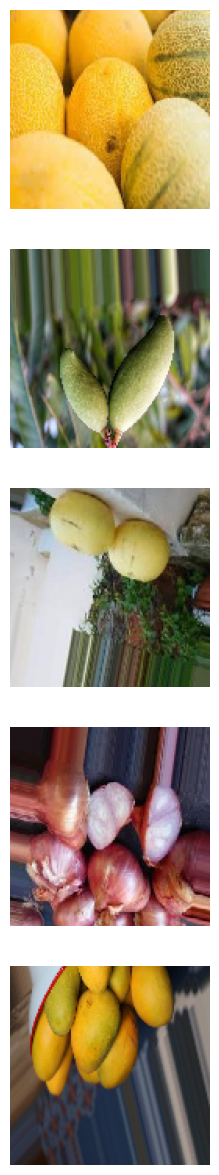

In [ ]:
#plotting images
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(val_data_gen)
plotImages(sample_training_images[:5])

Found 23972 images belonging to 30 classes.


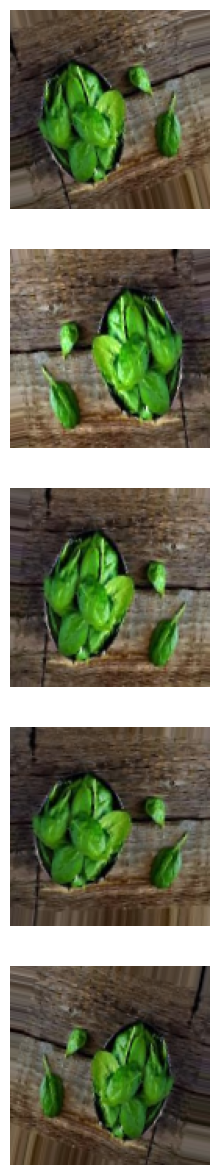

In [ ]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='categorical')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [ ]:
import os

folder = new_train_dir
all_class_folders = [f for f in os.listdir(folder) if os.path.isdir(os.path.join(folder, f))]
print("Total class folders:", len(all_class_folders))
print("Class folders:", all_class_folders)

Total class folders: 30
Class folders: ['Angiosperm_Myrtaceae_waterapple(Syzygium_samarangense)', 'Angiosperm_Musaceae_banana(Musa_acuminata)', 'Angiosperm_Euphorbiaceae_cassava(Manihot_esculenta)', 'Angiosperm_Fabaceae_longbeans(Vigna_unguiculata_subsp._sesquipedalis)', 'Angiosperm_Cucurbitaceae_melon(Cucumis_melo)', 'Angiosperm_Cucurbitaceae_watermelon(Citrullus_lanatus)', 'Angiosperm_Zingiberaceae_ginger(Zingiber_officinale)', 'Angiosperm_Fabaceae_soybeans(Glycine_max)', 'Angiosperm_Amaranthaceae_spinach(Spinacia_oleracea)', 'Angiosperm_Bromeliaceae_pineapple(Ananas_comosus)', 'Angiosperm_Asphodelaceae_aloevera(Aloe_vera)', 'Angiosperm_Solanaceae_eggplant(Solanum_melongena)', 'Angiosperm_Oxalidaceae_bilimbi(Averrhoa_bilimbi)', 'Angiosperm_Myrtaceae_guava(Psidium_guajava)', 'Angiosperm_Caricaceae_papaya(Carica_papaya)', 'Angiosperm_Amaryllidaceae_shallot(Allium_cepa_var._aggregatum)', 'Angiosperm_Cucurbitaceae_cucumber(Cucumis_sativus)', 'Angiosperm_Solanaceae_peper_chili(Capsicum_an

## Error Correction

In [ ]:
train_classes = set(os.listdir(new_train_dir))
val_classes = set(os.listdir(new_val_dir))
test_classes = set(os.listdir(new_test_dir))

print("Train only:", train_classes - val_classes)
print("Val only:", val_classes - train_classes)
print("Test only:", test_classes - train_classes)


Train only: set()
Val only: set()
Test only: set()


In [ ]:
print("Train indices:", train_data_gen.class_indices)
print("Val indices:", val_data_gen.class_indices)
print("Test indices:", test_data_gen.class_indices)


Train indices: {'aloevera': 0, 'banana': 1, 'bilimbi': 2, 'cantaloupe': 3, 'cassava': 4, 'coconut': 5, 'corn': 6, 'cucumber': 7, 'curcuma': 8, 'eggplant': 9, 'galangal': 10, 'ginger': 11, 'guava': 12, 'kale': 13, 'longbeans': 14, 'mango': 15, 'melon': 16, 'orange': 17, 'paddy': 18, 'papaya': 19, 'peper chili': 20, 'pineapple': 21, 'pomelo': 22, 'shallot': 23, 'soybeans': 24, 'spinach': 25, 'sweet potatoes': 26, 'tobacco': 27, 'waterapple': 28, 'watermelon': 29}
Val indices: {'Angiosperm_Amaranthaceae_spinach(Spinacia_oleracea)': 0, 'Angiosperm_Amaryllidaceae_shallot(Allium_cepa_var._aggregatum)': 1, 'Angiosperm_Anacardiaceae_mango(Mangifera_indica)': 2, 'Angiosperm_Arecaceae_coconut(Cocos_nucifera)': 3, 'Angiosperm_Asphodelaceae_aloevera(Aloe_vera)': 4, 'Angiosperm_Brassicaceae_kale(Brassica_oleracea_var._sabellica)': 5, 'Angiosperm_Bromeliaceae_pineapple(Ananas_comosus)': 6, 'Angiosperm_Caricaceae_papaya(Carica_papaya)': 7, 'Angiosperm_Convolvulaceae_sweet_potatoes(Ipomoea_batatas)': 

In [ ]:
import os

# Mapping from short common names to full hierarchical class names
rename_map = {
    'aloevera': 'Angiosperm_Asphodelaceae_aloevera(Aloe_vera)',
    'banana': 'Angiosperm_Musaceae_banana(Musa_acuminata)',
    'bilimbi': 'Angiosperm_Oxalidaceae_bilimbi(Averrhoa_bilimbi)',
    'cantaloupe': 'Angiosperm_Cucurbitaceae_cantaloupe(Cucumis_melo_cantalupensis)',
    'cassava': 'Angiosperm_Euphorbiaceae_cassava(Manihot_esculenta)',
    'coconut': 'Angiosperm_Arecaceae_coconut(Cocos_nucifera)',
    'corn': 'Angiosperm_Poaceae_corn(Zea_mays)',
    'cucumber': 'Angiosperm_Cucurbitaceae_cucumber(Cucumis_sativus)',
    'curcuma': 'Angiosperm_Zingiberaceae_curcuma(Curcuma_longa)',
    'eggplant': 'Angiosperm_Solanaceae_eggplant(Solanum_melongena)',
    'galangal': 'Angiosperm_Zingiberaceae_galangal(Alpinia_galanga)',
    'ginger': 'Angiosperm_Zingiberaceae_ginger(Zingiber_officinale)',
    'guava': 'Angiosperm_Myrtaceae_guava(Psidium_guajava)',
    'kale': 'Angiosperm_Brassicaceae_kale(Brassica_oleracea_var._sabellica)',
    'longbeans': 'Angiosperm_Fabaceae_longbeans(Vigna_unguiculata_subsp._sesquipedalis)',
    'mango': 'Angiosperm_Anacardiaceae_mango(Mangifera_indica)',
    'melon': 'Angiosperm_Cucurbitaceae_melon(Cucumis_melo)',
    'orange': 'Angiosperm_Rutaceae_orange(Citrus_sinensis)',
    'paddy': 'Angiosperm_Poaceae_paddy(Oryza_sativa)',
    'papaya': 'Angiosperm_Caricaceae_papaya(Carica_papaya)',
    'peper chili': 'Angiosperm_Solanaceae_peper_chili(Capsicum_annuum)',
    'pineapple': 'Angiosperm_Bromeliaceae_pineapple(Ananas_comosus)',
    'pomelo': 'Angiosperm_Rutaceae_pomelo(Citrus_maxima)',
    'shallot': 'Angiosperm_Amaryllidaceae_shallot(Allium_cepa_var._aggregatum)',
    'soybeans': 'Angiosperm_Fabaceae_soybeans(Glycine_max)',
    'spinach': 'Angiosperm_Amaranthaceae_spinach(Spinacia_oleracea)',
    'sweet potatoes': 'Angiosperm_Convolvulaceae_sweet_potatoes(Ipomoea_batatas)',
    'tobacco': 'Angiosperm_Solanaceae_tobacco(Nicotiana_tabacum)',
    'waterapple': 'Angiosperm_Myrtaceae_waterapple(Syzygium_samarangense)',
    'watermelon': 'Angiosperm_Cucurbitaceae_watermelon(Citrullus_lanatus)'
}

train_dir = new_train_dir

for old_name in os.listdir(train_dir):
    old_path = os.path.join(train_dir, old_name)
    if os.path.isdir(old_path) and old_name in rename_map:
        new_name = rename_map[old_name]
        new_path = os.path.join(train_dir, new_name)
        os.rename(old_path, new_path)
        print(f"Renamed: {old_name} → {new_name}")



In [ ]:
print(train_data_gen.class_indices)

{'aloevera': 0, 'banana': 1, 'bilimbi': 2, 'cantaloupe': 3, 'cassava': 4, 'coconut': 5, 'corn': 6, 'cucumber': 7, 'curcuma': 8, 'eggplant': 9, 'galangal': 10, 'ginger': 11, 'guava': 12, 'kale': 13, 'longbeans': 14, 'mango': 15, 'melon': 16, 'orange': 17, 'paddy': 18, 'papaya': 19, 'peper chili': 20, 'pineapple': 21, 'pomelo': 22, 'shallot': 23, 'soybeans': 24, 'spinach': 25, 'sweet potatoes': 26, 'tobacco': 27, 'waterapple': 28, 'watermelon': 29}


In [ ]:
print(train_data_gen.class_indices)
print(val_data_gen.class_indices)
print(test_data_gen.class_indices)

{'aloevera': 0, 'banana': 1, 'bilimbi': 2, 'cantaloupe': 3, 'cassava': 4, 'coconut': 5, 'corn': 6, 'cucumber': 7, 'curcuma': 8, 'eggplant': 9, 'galangal': 10, 'ginger': 11, 'guava': 12, 'kale': 13, 'longbeans': 14, 'mango': 15, 'melon': 16, 'orange': 17, 'paddy': 18, 'papaya': 19, 'peper chili': 20, 'pineapple': 21, 'pomelo': 22, 'shallot': 23, 'soybeans': 24, 'spinach': 25, 'sweet potatoes': 26, 'tobacco': 27, 'waterapple': 28, 'watermelon': 29}
{'Angiosperm_Amaranthaceae_spinach(Spinacia_oleracea)': 0, 'Angiosperm_Amaryllidaceae_shallot(Allium_cepa_var._aggregatum)': 1, 'Angiosperm_Anacardiaceae_mango(Mangifera_indica)': 2, 'Angiosperm_Arecaceae_coconut(Cocos_nucifera)': 3, 'Angiosperm_Asphodelaceae_aloevera(Aloe_vera)': 4, 'Angiosperm_Brassicaceae_kale(Brassica_oleracea_var._sabellica)': 5, 'Angiosperm_Bromeliaceae_pineapple(Ananas_comosus)': 6, 'Angiosperm_Caricaceae_papaya(Carica_papaya)': 7, 'Angiosperm_Convolvulaceae_sweet_potatoes(Ipomoea_batatas)': 8, 'Angiosperm_Cucurbitaceae

# Model Simuation

## CNN Model

In [ ]:
print("Number of classes in train_data_gen:", train_data_gen.num_classes)

Number of classes in train_data_gen: 30


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define your image dimensions and number of classes
IMG_HEIGHT = 150
IMG_WIDTH = 150
num_classes = train_data_gen.num_classes

# Load MobileNetV2 as feature extractor
base_model = MobileNetV2(input_shape=(128, 128, 3),
                         include_top=False,
                         weights='imagenet')

base_model.trainable = False  # freeze for feature extraction

# Add classification head
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(train_data_gen.num_classes, activation='softmax')  # Number of species/common names
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_128            │ (None, 4, 4, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_10     │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 30)             │         7,710 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,593,630 (9.89 MB)

 Trainable params: 335,646 (1.28 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, min_lr=1e-6)
checkpoint = ModelCheckpoint('best_plant_model.h5', save_best_only=True)


In [ ]:
history = model.fit(
    train_data_gen,
    validation_data=val_data_gen,
    epochs=12,
    callbacks=[early_stop, reduce_lr, checkpoint]
)

Epoch 1/12
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2336 - loss: 2.8747

375/375 ━━━━━━━━━━━━━━━━━━━━ 630s 2s/step - accuracy: 0.2340 - loss: 2.8728 - val_accuracy: 0.6993 - val_loss: 1.0915 - learning_rate: 1.0000e-04
Epoch 2/12
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6400 - loss: 1.2285

375/375 ━━━━━━━━━━━━━━━━━━━━ 591s 2s/step - accuracy: 0.6400 - loss: 1.2282 - val_accuracy: 0.7792 - val_loss: 0.7621 - learning_rate: 1.0000e-04
Epoch 3/12
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7196 - loss: 0.9235

375/375 ━━━━━━━━━━━━━━━━━━━━ 591s 2s/step - accuracy: 0.7196 - loss: 0.9234 - val_accuracy: 0.8083 - val_loss: 0.6336 - learning_rate: 1.0000e-04
Epoch 4/12
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7663 - loss: 0.7655

375/375 ━━━━━━━━━━━━━━━━━━━━ 587s 2s/step - accuracy: 0.7663 - loss: 0.7654 - val_accuracy: 0.8323 - val_loss: 0.5537 - learning_rate: 1.0000e-04
Epoch 5/12
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7910 - loss: 0.6741

375/375 ━━━━━━━━━━━━━━━━━━━━ 596s 2s/step - accuracy: 0.7910 - loss: 0.6741 - val_accuracy: 0.8525 - val_loss: 0.4953 - learning_rate: 1.0000e-04
Epoch 6/12
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8085 - loss: 0.6082

375/375 ━━━━━━━━━━━━━━━━━━━━ 593s 2s/step - accuracy: 0.8085 - loss: 0.6082 - val_accuracy: 0.8637 - val_loss: 0.4530 - learning_rate: 1.0000e-04
Epoch 7/12
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8319 - loss: 0.5412

375/375 ━━━━━━━━━━━━━━━━━━━━ 595s 2s/step - accuracy: 0.8319 - loss: 0.5411 - val_accuracy: 0.8690 - val_loss: 0.4209 - learning_rate: 1.0000e-04
Epoch 8/12
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8463 - loss: 0.4931

375/375 ━━━━━━━━━━━━━━━━━━━━ 600s 2s/step - accuracy: 0.8463 - loss: 0.4931 - val_accuracy: 0.8822 - val_loss: 0.3904 - learning_rate: 1.0000e-04
Epoch 9/12
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8556 - loss: 0.4667

375/375 ━━━━━━━━━━━━━━━━━━━━ 599s 2s/step - accuracy: 0.8556 - loss: 0.4667 - val_accuracy: 0.8795 - val_loss: 0.3770 - learning_rate: 1.0000e-04
Epoch 10/12
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8660 - loss: 0.4306

375/375 ━━━━━━━━━━━━━━━━━━━━ 591s 2s/step - accuracy: 0.8660 - loss: 0.4306 - val_accuracy: 0.8950 - val_loss: 0.3516 - learning_rate: 1.0000e-04
Epoch 11/12
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8764 - loss: 0.3946

375/375 ━━━━━━━━━━━━━━━━━━━━ 588s 2s/step - accuracy: 0.8764 - loss: 0.3946 - val_accuracy: 0.8957 - val_loss: 0.3340 - learning_rate: 1.0000e-04
Epoch 12/12
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8842 - loss: 0.3672

375/375 ━━━━━━━━━━━━━━━━━━━━ 625s 2s/step - accuracy: 0.8841 - loss: 0.3672 - val_accuracy: 0.9046 - val_loss: 0.3172 - learning_rate: 1.0000e-04


In [ ]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(test_data_gen)
print(f"\nTest Accuracy: {test_accuracy*100:.2f}%")

47/47 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.8880 - loss: 0.3349

Test Accuracy: 89.59%


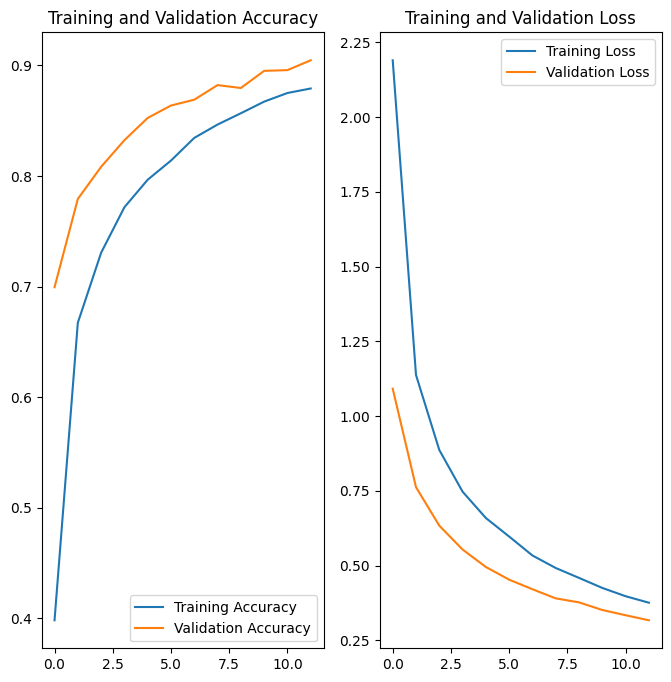

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Prediction Example

In [ ]:
# Map class indices to labels
class_indices = train_data_gen.class_indices
label_map = {v: k for k, v in class_indices.items()}

# Predict on test images
import numpy as np

test_images, test_labels = next(test_data_gen)
predictions = model.predict(test_images)

predicted_classes = np.argmax(predictions, axis=1)
actual_classes = np.argmax(test_labels, axis=1)

def display_hierarchical_label(label):
    parts = label.split('_')
    if len(parts) > 2:
        group = parts[0]
        family = parts[1]
        # The rest is the common name and species
        name_species = "_".join(parts[2:])
        # Extract common name and species from the last part
        import re
        match = re.match(r"(.*)\((.*)\)", name_species)
        if match:
            common_name = match.group(1).replace('_', ' ')
            species = match.group(2).replace('_', ' ')
            return f"Group: {group}\n  Family: {family}\n    Common Name: {common_name}\n      Species: {species}"
        else:
             return label.replace('_', ' ') # Fallback if format is unexpected
    else:
        return label.replace('_', ' ') # Fallback for unexpected format


for i in range(5):
    predicted_label_flat = label_map[predicted_classes[i]]
    actual_label_flat = label_map[actual_classes[i]]

    print(f"--- Prediction {i+1} ---")
    print("Predicted:")
    print(display_hierarchical_label(predicted_label_flat))
    print("Actual:")
    print(display_hierarchical_label(actual_label_flat))
    print("-" * 20)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step
--- Prediction 1 ---
Predicted:
Group: Angiosperm
  Family: Amaryllidaceae
    Common Name: shallot
      Species: Allium cepa var. aggregatum
Actual:
Group: Angiosperm
  Family: Amaryllidaceae
    Common Name: shallot
      Species: Allium cepa var. aggregatum
--------------------
--- Prediction 2 ---
Predicted:
Group: Angiosperm
  Family: Amaryllidaceae
    Common Name: shallot
      Species: Allium cepa var. aggregatum
Actual:
Group: Angiosperm
  Family: Amaryllidaceae
    Common Name: shallot
      Species: Allium cepa var. aggregatum
--------------------
--- Prediction 3 ---
Predicted:
Group: Angiosperm
  Family: Amaryllidaceae
    Common Name: shallot
      Species: Allium cepa var. aggregatum
Actual:
Group: Angiosperm
  Family: Amaryllidaceae
    Common Name: shallot
      Species: Allium cepa var. aggregatum
--------------------
--- Prediction 4 ---
Predicted:
Group: Angiosperm
  Family: Arecaceae
    Common Name: coconut
      Species: Co

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plotImages(images_arr, probabilities=None, class_names=None):
    """Plots images with optional predicted probabilities and class names."""
    fig, axes = plt.subplots(1, len(images_arr), figsize=(20, 20))
    axes = axes.flatten()
    for img, ax, probs in zip(images_arr, axes, probabilities): # Iterate through images, axes, and probabilities
        ax.imshow(img)
        if probabilities is not None and class_names is not None:
            # Get the predicted class index (index of the highest probability)
            predicted_class_index = np.argmax(probs) # Use probabilities for the current image
            # Get the probability of the predicted class
            predicted_probability = np.max(probs) # Use probabilities for the current image
            # Get the predicted class name
            predicted_class_name = class_names[predicted_class_index]
            ax.set_title(f"{predicted_class_name}: {predicted_probability:.2f}")
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Assuming you have a list of class names available from your data generator
# class_names = list(train_data_gen.class_indices.keys())
# You might need to define class_names based on your dataset structure

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 450ms/step


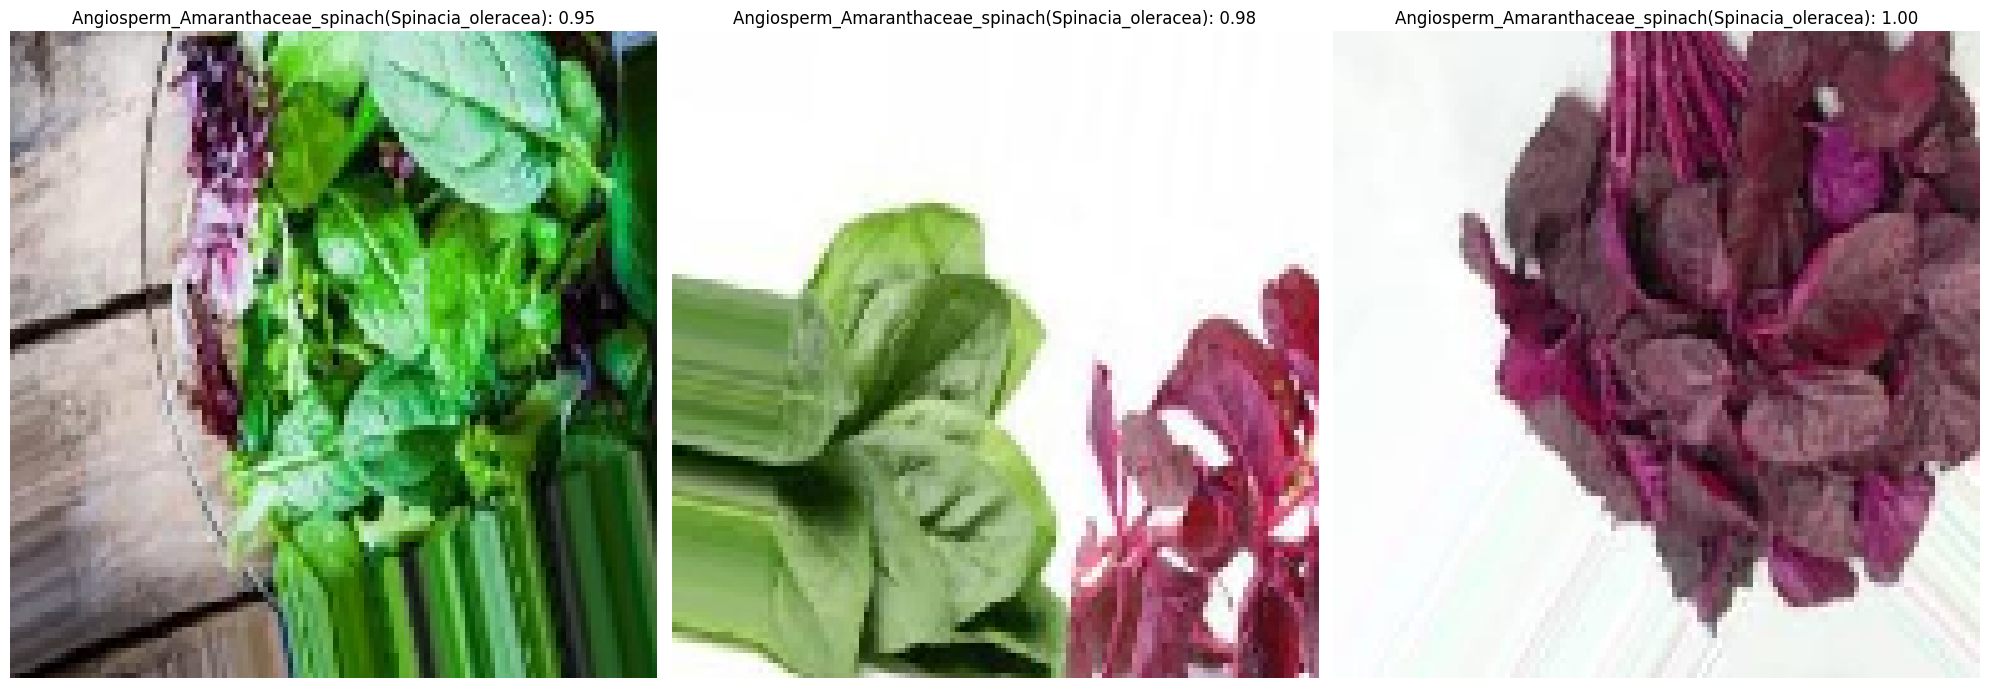

In [ ]:
import numpy as np

test_images, test_labels = next(test_data_gen)
probabilities = model.predict(test_images)

# Get the class names from the data generator
class_names = list(test_data_gen.class_indices.keys())

# Plot images with predicted probabilities and class names
# Adjusted to plot only the first 5 images for better readability
plotImages(test_images[:3], probabilities=probabilities[:5], class_names=class_names)

## Test Data Prediction

Please upload an image of the plant:


Saving How To Grow Aloe Vera As A Houseplant - The Incredible Plant That Heals!.jpeg to How To Grow Aloe Vera As A Houseplant - The Incredible Plant That Heals!.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step

📸 Prediction based on image: How To Grow Aloe Vera As A Houseplant - The Incredible Plant That Heals!.jpeg


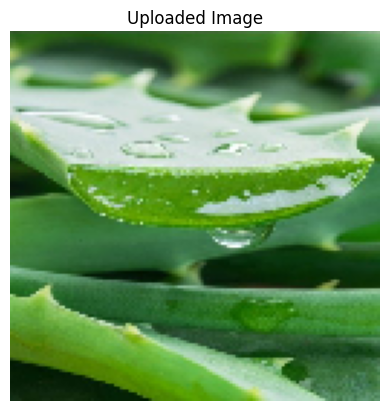

Do you want to know the group of the plant? (yes/no/end): yes
👉 Predicted Group: Angiosperm
Do you want to know the family of the plant? (yes/no/end): yes
👉 Predicted Family: Asphodelaceae
Do you want to know the common_name of the plant? (yes/no/end): yes
👉 Predicted Common_Name: aloevera
Do you want to know the species of the plant? (yes/no/end): yes
👉 Predicted Species: Aloe vera

Finished providing plant information.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import os
import re
from google.colab import files

# --- Load Label Map ---
class_indices = train_data_gen.class_indices
label_map = {v: k for k, v in class_indices.items()}

# --- Upload a single image ---
print("Please upload an image of the plant:")
uploaded = files.upload()

if not uploaded:
    raise ValueError("No file uploaded.")

# Assuming only one file is uploaded
img_name = list(uploaded.keys())[0]
img_path = img_name # Use the uploaded file name as the path

# --- Preprocess image ---
IMG_HEIGHT, IMG_WIDTH = 128, 128
img = image.load_img(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)  # Use same preprocessing as during training

# --- Make prediction ---
pred = model.predict(img_array)
predicted_class_idx = np.argmax(pred[0])
predicted_label = label_map[predicted_class_idx]

# --- Extract relevant hierarchical part ---
def extract_part(label, focus):
    # Example label: Angiosperm_Amaryllidaceae_shallot(Allium_cepa_var._aggregatum)
    match = re.match(r"([^_]+)_([^_]+)_(.*)\((.*)\)", label)
    if not match:
        return label  # fallback if label format is unexpected

    group, family, common_name, species = match.groups()
    common_name = common_name.replace('_', ' ')
    species = species.replace('_', ' ')

    if focus == "group":
        return group
    elif focus == "family":
        return family
    elif focus == "common_name":
        return common_name
    elif focus == "species":
        return species
    return label  # fallback


# --- Show prediction result for each focus ---
focus_options = ['group', 'family', 'common_name', 'species']

print(f"\n📸 Prediction based on image: {img_name}")
plt.imshow(img)
plt.axis('off')
plt.title(f"Uploaded Image")
plt.show()

for focus in focus_options:
    user_response = input(f"Do you want to know the {focus} of the plant? (yes/no/end): ").strip().lower()
    if user_response == 'yes':
        answer = extract_part(predicted_label, focus)
        print(f"👉 Predicted {focus.title()}: {answer}")
    elif user_response == 'no':
        continue
    elif user_response == 'end':
        print("Ending the questioning.")
        break
    else:
        print("Invalid input. Please answer 'yes', 'no', or 'end'.")
        # Optionally, you could break or continue based on desired behavior for invalid input
        continue

print("\nFinished providing plant information.")

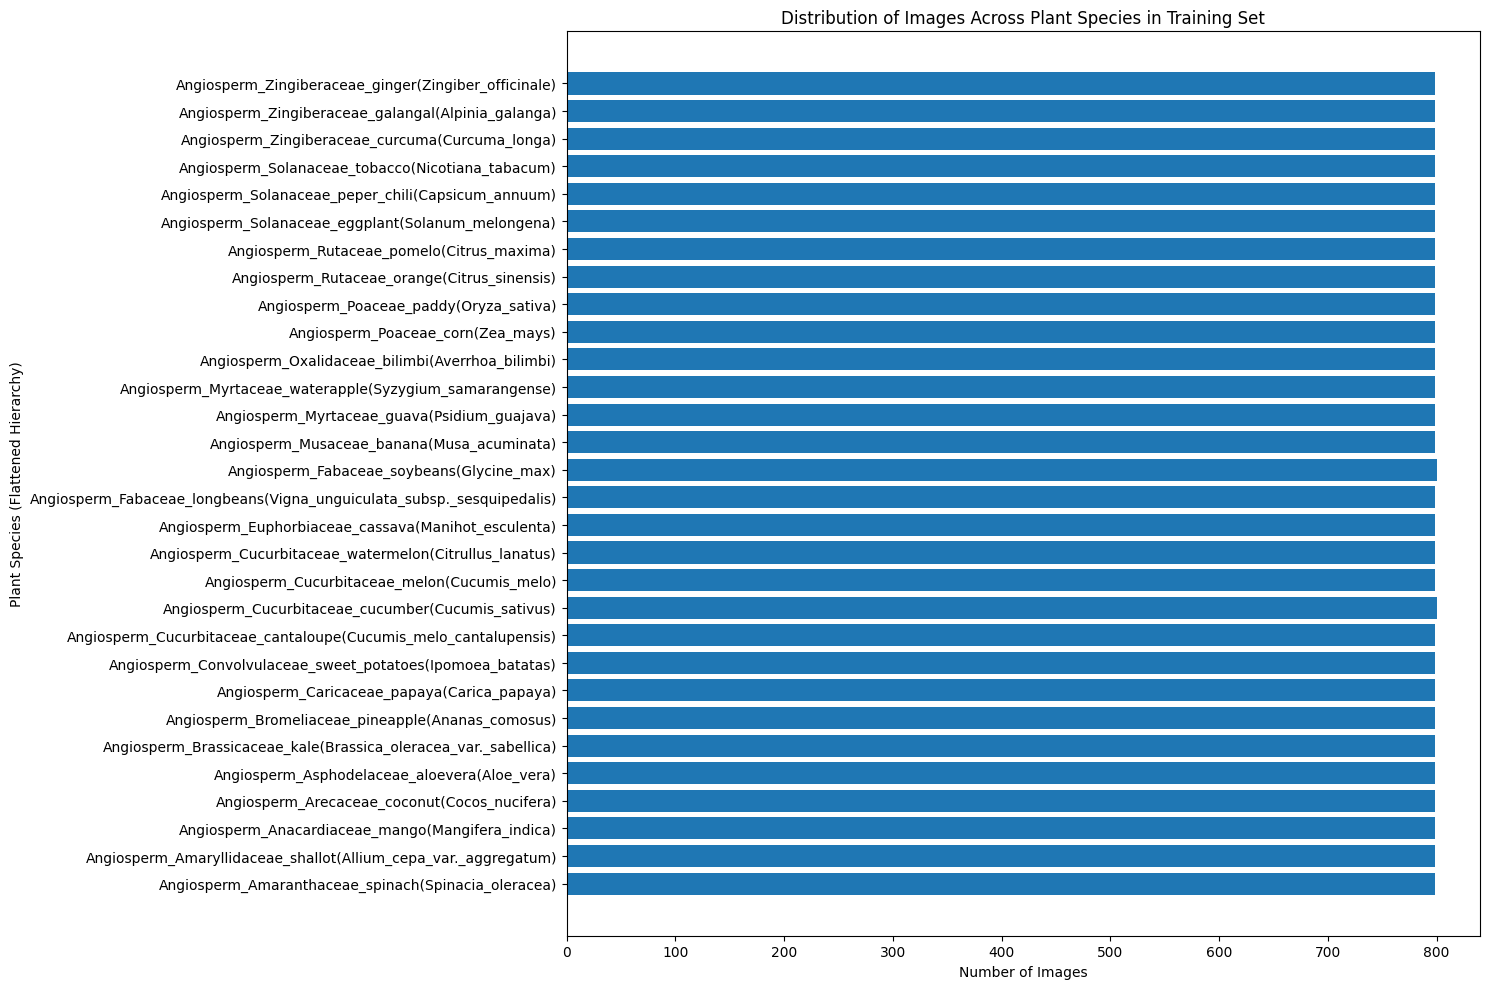

In [ ]:
import matplotlib.pyplot as plt
import os

# Assuming new_train_dir is already defined and contains the flattened class folders
class_counts = {}
for class_name in os.listdir(new_train_dir):
    class_path = os.path.join(new_train_dir, class_name)
    if os.path.isdir(class_path):
        # Count only image files (you can add more extensions if needed)
        image_count = len([f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
        class_counts[class_name] = image_count

# Sort the classes alphabetically for consistent plotting
sorted_class_names = sorted(class_counts.keys())
sorted_class_counts = [class_counts[name] for name in sorted_class_names]

plt.figure(figsize=(15, 10)) # Increased figure height for better readability of horizontal bars
plt.barh(sorted_class_names, sorted_class_counts) # Use barh for horizontal bars
plt.ylabel("Plant Species (Flattened Hierarchy)") # Swap xlabel and ylabel
plt.xlabel("Number of Images")
plt.title("Distribution of Images Across Plant Species in Training Set")
# No need for xticks rotation for horizontal bars
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

--- Samples for class: Angiosperm_Amaryllidaceae_shallot(Allium_cepa_var._aggregatum) ---


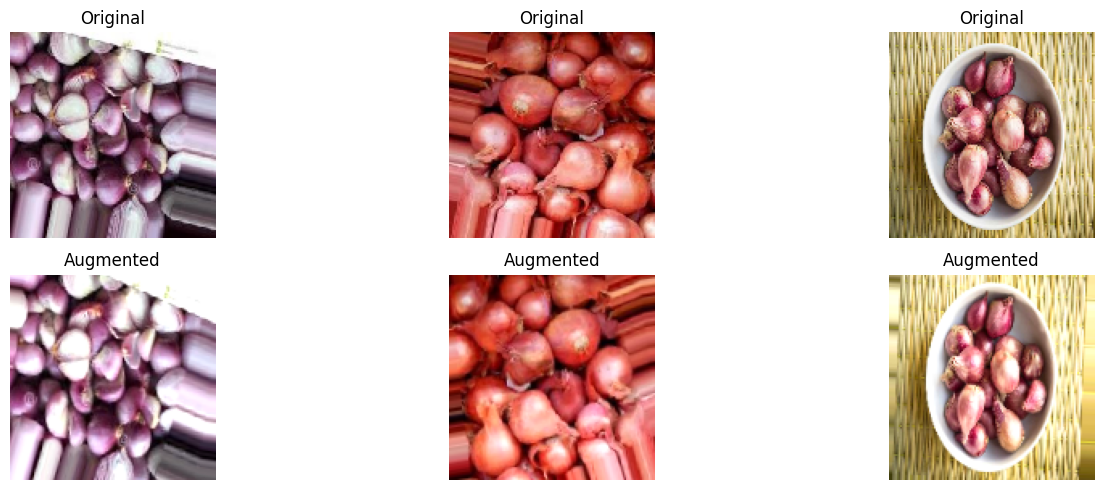

--- Samples for class: Angiosperm_Brassicaceae_kale(Brassica_oleracea_var._sabellica) ---


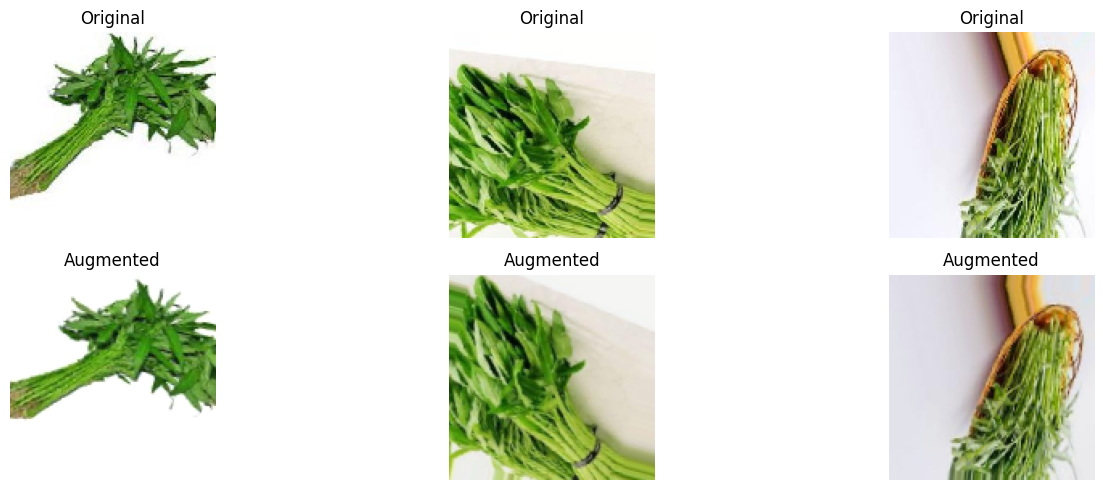

--- Samples for class: Angiosperm_Bromeliaceae_pineapple(Ananas_comosus) ---


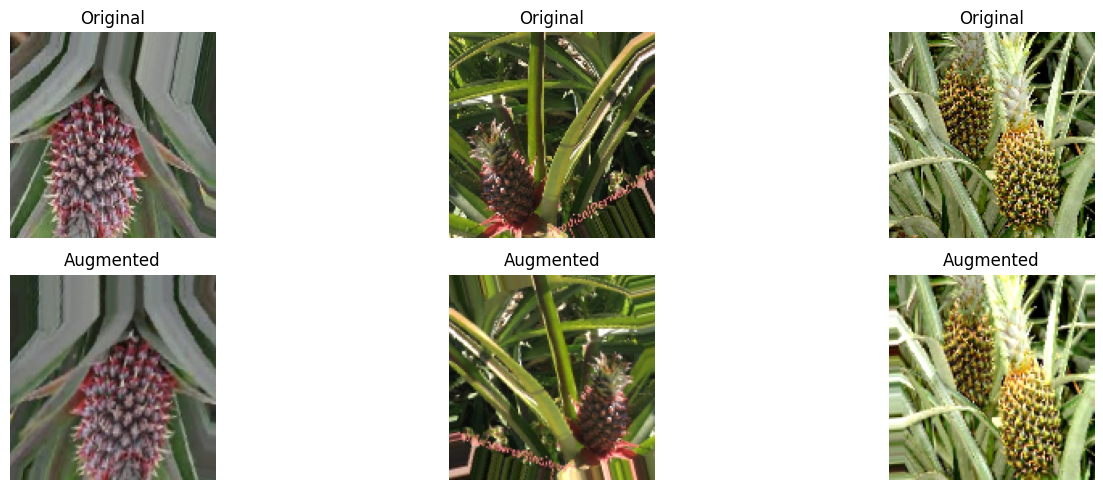

--- Samples for class: Angiosperm_Musaceae_banana(Musa_acuminata) ---


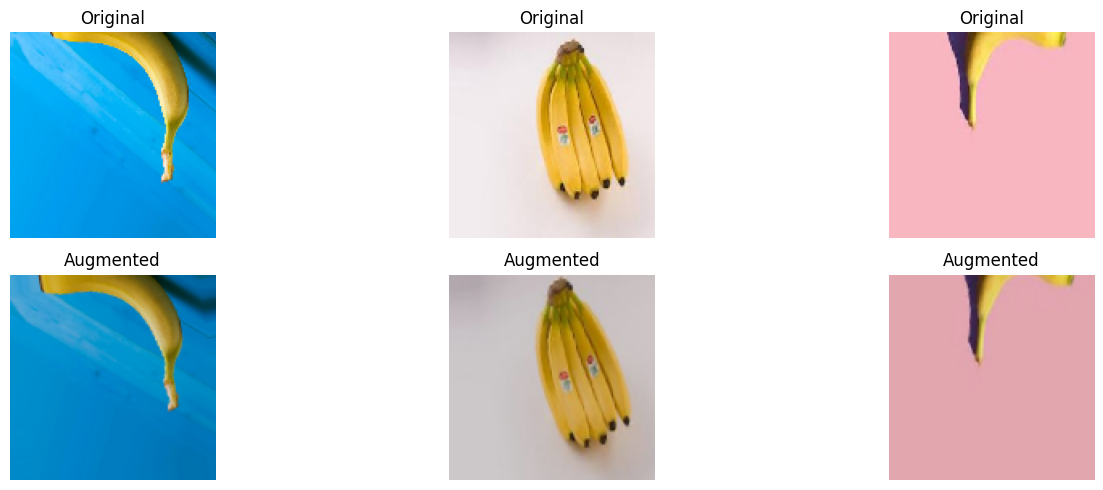

--- Samples for class: Angiosperm_Anacardiaceae_mango(Mangifera_indica) ---


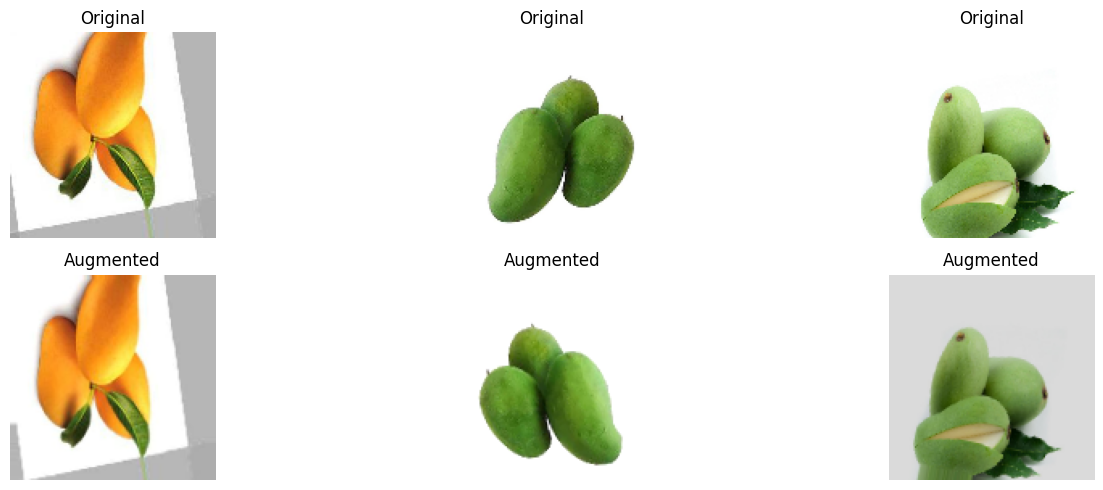

In [ ]:
import random
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing import image
import numpy as np

# Assuming new_train_dir is defined
sample_size = 3 # Number of sample images per class to display

# Get list of class directories
class_dirs = [d for d in os.listdir(new_train_dir) if os.path.isdir(os.path.join(new_train_dir, d))]

# Select a random subset of class directories to display for brevity, or display all if needed
num_classes_to_display = 5  # Display samples from 5 classes
if len(class_dirs) > num_classes_to_display:
    selected_class_dirs = random.sample(class_dirs, num_classes_to_display)
else:
    selected_class_dirs = class_dirs

for class_name in selected_class_dirs:
    class_path = os.path.join(new_train_dir, class_name)
    image_files = [os.path.join(class_path, f) for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    print(f"--- Samples for class: {class_name} ---")

    # Select a random subset of images from the class
    if len(image_files) > sample_size:
        sample_image_files = random.sample(image_files, sample_size)
    else:
        sample_image_files = image_files

    plt.figure(figsize=(15, 5)) # Adjust figure size as needed

    for i, img_path in enumerate(sample_image_files):
        # Load original image
        img = image.load_img(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) # Add batch dimension

        # Display original image
        ax = plt.subplot(2, sample_size, i + 1)
        ax.imshow(img)
        ax.set_title("Original")
        ax.axis("off")

        # Generate and display augmented image
        augmented_images = train_image_generator.flow(img_array, batch_size=1)
        augmented_img = next(augmented_images)[0] # Get one augmented image

        # Rescale the augmented image back to 0-255 range for display
        augmented_img_display = (augmented_img * 255).astype('uint8')

        ax = plt.subplot(2, sample_size, i + sample_size + 1)
        ax.imshow(augmented_img_display)
        ax.set_title("Augmented")
        ax.axis("off")

    plt.tight_layout()
    plt.show()